<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M19_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [2]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




In [4]:
from statsmodels.stats.weightstats import ztest

# 1. Executando o Teste Z
# 'alternative=smaller' porque estamos testando se a média de A é MENOR que a de B
z_score, p_valor = ztest(amostra_estrategia_A, amostra_estrategia_B, alternative='smaller')

print(f"Estatística Z: {z_score:.4f}")
print(f"P-valor: {p_valor:.4f}")

# 2. Avaliação do Resultado
alfa = 0.05
if p_valor < alfa:
    print("Conclusão: Rejeitamos a hipótese nula (H0). A Estratégia B é estatisticamente superior à A.")
else:
    print("Conclusão: Falhamos em rejeitar a hipótese nula (H0). Não há evidência suficiente de que a Estratégia B seja melhor.")

Estatística Z: -1.5267
P-valor: 0.0634
Conclusão: Falhamos em rejeitar a hipótese nula (H0). Não há evidência suficiente de que a Estratégia B seja melhor.


**O teste é unilateral à esquerd**a

A direção da Hipótese Alternativa ($H_1$): O que define a "cauda" do teste é a $H_1$. No caso, testamos se a Estratégia B é maior que a A. Matematicamente, ao usar a função ztest(amostra_A, amostra_B), o software calcula a diferença como $(A - B)$.

-Se $B > A$, o resultado dessa conta será um número negativo.

-Portanto, estamos procurando evidências na cauda esquerda (valores negativos) da distribuição.

O uso do parâmetro no código: No código, utilizamos alternative='smaller'. Isso indica explicitamente ao algoritmo que queremos verificar se a média da primeira amostra (A) é significativamente menor que a da segunda (B).

**Diferença entre os tipos:**

-Bicaudal: Seria usado se a pergunta fosse apenas "Existe uma diferença entre as notas?", sem importar quem é maior.

-Unilateral à Direita: Seria usado se quiséssemos provar que a Estratégia A é melhor que a B ($A > B$).

-Unilateral à Esquerda: É o seu caso, pois o foco é provar que a média de A está estatisticamente abaixo da média de B.

**Curiosidade sobre o resultado:**

Como o seu P-valor (0.0634) foi maior que 0.05, a área da "cauda esquerda" ocupada pelos seus dados é muito grande, por isso não conseguimos rejeitar a hipótese nula. Se o Z fosse mais negativo (ex: -1.96), o P-valor cairia e o teste seria significante.

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [6]:
# Cálculo das médias
media_A = np.mean(amostra_estrategia_A)
media_B = np.mean(amostra_estrategia_B)

# Cálculo das variâncias (ddof=1 para variância amostral)
variancia_A = np.var(amostra_estrategia_A, ddof=1)
variancia_B = np.var(amostra_estrategia_B, ddof=1)

print(f"Estratégia A -> Média: {media_A:.2f} | Variância: {variancia_A:.2f}")
print(f"Estratégia B -> Média: {media_B:.2f} | Variância: {variancia_B:.2f}")

Estratégia A -> Média: 71.41 | Variância: 129.27
Estratégia B -> Média: 74.75 | Variância: 110.47


Ao observar esses números, podemos extrair três conclusões fundamentais sobre o desempenho dos alunos:

**1. Superioridade Nominal vs. Significância Estatística**

A média da Estratégia B é maior que a da A (uma diferença de aproximadamente 2.7 a 3 pontos). No entanto, o seu teste Z resultou em um P-valor de 0.0634.

Insight: Embora B pareça melhor à primeira vista, a diferença não é grande o suficiente para descartar que foi "sorte" na escolha da amostra. Em estatística, "quase melhor" ainda é considerado "estatisticamente igual" se não ultrapassar o limite de 0.05.

**2. O Impacto da Variância (Consistência)**

A Estratégia B apresenta uma variância maior do que a A.

Insight: Isso indica que a Estratégia B é menos "previsível". Enquanto na Estratégia A os alunos tendem a ter notas mais próximas da média, na B existem alunos com notas muito altas e outros com notas muito baixas. A estratégia B pode ser mais eficaz para alguns perfis de alunos, mas gera uma desigualdade maior na sala de aula.

**3. Sobreposição das Notas**

Como a diferença entre as médias é pequena (cerca de 3 pontos) e as variâncias são altas, existe uma grande sobreposição entre os dois grupos.

Insight: Se você escolher um aluno aleatório de qualquer grupo, há uma chance alta de ele ter uma nota que poderia pertencer a qualquer uma das duas estratégias. Para que uma estratégia fosse considerada "revolucionária", precisaríamos ver a média aumentar e a variância diminuir (notas altas e consistentes).

**Resumo do Cenário**

A Estratégia B tem potencial, mas a alta variância (instabilidade dos resultados) "puxa" o P-valor para cima, impedindo que a escola afirme com 95% de certeza que o novo método é superior.

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [7]:
print(f"Estatística Z: {z_stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Critério de Decisão
alfa = 0.05
if p_valor < alfa:
    print("Decisão: REJEITAMOS a hipótese nula (H0).")
else:
    print("Decisão: NÃO REJEITAMOS a hipótese nula (H0).")

Estatística Z: -1.5267
P-valor: 0.0634
Decisão: NÃO REJEITAMOS a hipótese nula (H0).


Não rejeitaremos a hipótese nula ($H_0$).

Motivos:

**Comparação com o Nível de Significância ($\alpha$):** O nosso P-valor calculado foi de 0.0634 (6,34%), que é maior que o nível de significância padrão de 0.05 (5%). Em estatística, para rejeitarmos a hipótese nula, o P-valor deve ser estritamente menor que $\alpha$.

**Probabilidade do Acaso:** Um P-valor de 0.0634 indica que há uma probabilidade de aproximadamente 6,3% de que a diferença entre as notas das duas estratégias tenha ocorrido por puro acaso (variabilidade amostral) e não por uma eficácia real da Estratégia B. Como esse risco é superior ao limite de segurança adotado (5%), não podemos afirmar que a Estratégia B é melhor.

**Posição na Curva de Distribuição:** O valor de $Z = -1.5267$ não atingiu a "zona crítica" (que para um teste unilateral de 5% seria aproximadamente $-1.64$). Isso significa que a diferença entre as médias não é grande o suficiente em relação ao desvio padrão para ser considerada estatisticamente relevante.

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

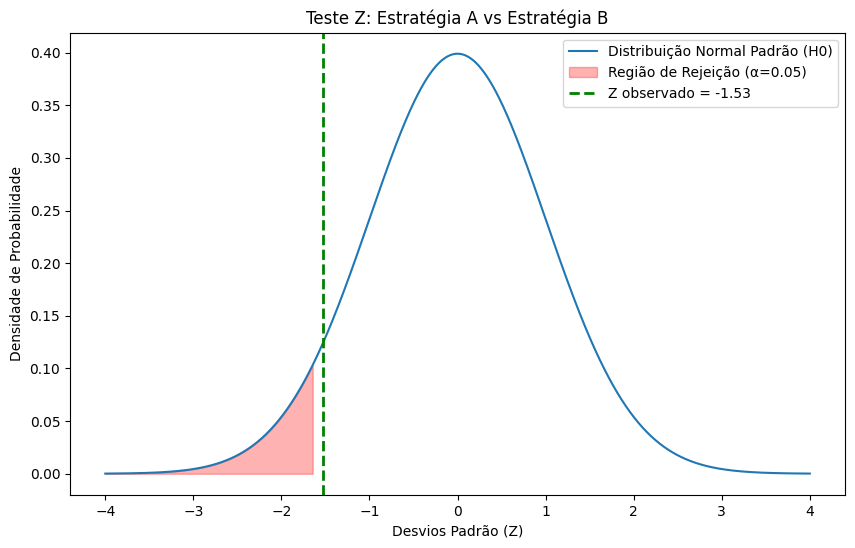

In [8]:
# Configurações da distribuição
mu = 0
std = 1
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mu, std)

# Valor crítico para alfa = 0.05 (unilateral à esquerda)
z_critico = stats.norm.ppf(0.05)
z_observado = -1.5267

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal Padrão (H0)')

# Destacando a Região de Rejeição (Cauda Esquerda)
x_rejeicao = np.linspace(-4, z_critico, 100)
plt.fill_between(x_rejeicao, stats.norm.pdf(x_rejeicao), color='red', alpha=0.3, label='Região de Rejeição (α=0.05)')

# Marcando o nosso Z observado
plt.axvline(z_observado, color='green', linestyle='--', linewidth=2, label=f'Z observado = {z_observado:.2f}')

plt.title('Teste Z: Estratégia A vs Estratégia B')
plt.xlabel('Desvios Padrão (Z)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

O gráfico mostra que a Estratégia B teve um desempenho superior, mas não de forma contundente. Faltou pouco para a evidência ser sólida. Na prática, isso sugere que a escola poderia repetir o teste com mais alunos para ver se essa tendência se confirma e o valor Z "empurra" para dentro da zona vermelha.